<a href="https://colab.research.google.com/github/jimsjoo/gilbut_portfolio/blob/master/1%EC%9E%A5_%ED%8C%8C%EC%9D%B4%EC%8D%AC%EA%B3%BC_%EC%9E%AC%EB%AC%B4%EA%B8%B0%EC%B4%88%EC%A7%80%EC%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 재무 기초 

# 단리이자계산

In [2]:
# 은행에 1천만원을 예금하고 1년후에 인출하기로 하였다. 1년후 받는 금액은 다음과 같다
a = 1000
n = 1
r = 0.05

s_simple = a*(1+r*n)
print(s_simple)

1050.0


In [3]:
import scipy as sp

a = 1000
n = 1
r = 0.05

s_simple = sp.fv(r, n, 0, a)
print(s_simple)

-1050.0


C:\Users\JYB\AppData\Local\Temp/ipykernel_736/2980967309.py:7: DeprecationWarning: scipy.fv is deprecated and will be removed in SciPy 2.0.0, use numpy.fv instead
  s_simple = sp.fv(r, n, 0, a)


In [5]:
# 월단위로 이자율을 계산하면 다음과 같다.
a = 1000
n = 12
r = 0.05/n

s_simple = a*(1+r*n)
print(s_simple)

1050.0


# 복리이자계산

In [6]:
import scipy as sp

a = 1000
n = 12
r = 0.05

s_simple = sp.fv(r/n, n, 0, a)
print(s_simple)

-1051.161897881733


C:\Users\JYB\AppData\Local\Temp/ipykernel_736/333954646.py:7: DeprecationWarning: scipy.fv is deprecated and will be removed in SciPy 2.0.0, use numpy.fv instead
  s_simple = sp.fv(r/n, n, 0, a)


In [7]:
# 5% 이자율을 월단위로 복리계산하는 경우
a = 1000
n = 12
r = 0.05

s_compound=a*(1+(r/n))**n
print(s_compound)

1051.161897881733


In [0]:
a = 1
r = 1.0

n = 1
c_compound = a*(1+r/n)**n
print(c_compound)

n = 2
c_compound = a*(1+r/n)**n
print(c_compound)

n = 4
c_compound = a*(1+r/n)**n
print(c_compound)

n = 12
c_compound = a*(1+r/n)**n
print(c_compound)

n = 52
c_compound = a*(1+r/n)**n
print(c_compound)

n = 365
c_compound = a*(1+r/n)**n
print(c_compound)

n = 8760
c_compound = a*(1+r/n)**n
print(c_compound)

n = 525600
c_compound = a*(1+r/n)**n
print(c_compound)

n = 31536000
c_compound = a*(1+r/n)**n
print(c_compound)


2.0
2.25
2.44140625
2.613035290224676
2.692596954437168
2.7145674820219727
2.7181266916179077
2.7182792426663553
2.7182817784689974


In [8]:
import math

a = 1
r = 1.0
c_compound = a*math.e**r
print(c_compound)

2.718281828459045


# 순현재가치(NPV)

In [9]:
cashflows = [ 12000 , 15000 , 18000 , 21000 , 26000 ]

i = 0
r = 0.015
npv = -70000

for c in cashflows:  
    i = i + 1
    npv = npv + c/(1+r)**i
    
print(npv)

17516.929512135568


In [10]:
import scipy as sp

cashflows = [ -70000, 12000 , 15000 , 18000 , 21000 , 26000 ]
r = 0.015

npv = sp.npv(r, cashflows)
print(npv)

17516.929512135568


C:\Users\JYB\AppData\Local\Temp/ipykernel_736/992042862.py:6: DeprecationWarning: scipy.npv is deprecated and will be removed in SciPy 2.0.0, use numpy.npv instead
  npv = sp.npv(r, cashflows)


# NPV와 IRR의 관계

In [ ]:
# 순현재가치 (NPV) : 미래 현금유입의 현재가치와 현금유출의 현재가치의 차이
# IRR : NPV를 0으로 해주는 할인율

In [12]:
# 현금흐름을 cashflows 리스트에 저장한다

# scipy 라이브러리의 irr함수를 사용하여 내부수익률을 계산한다

import scipy as sp

cashflows = [ -70000, 12000 , 15000 , 18000 , 21000 , 26000 ]

irr = sp.irr(cashflows)

# 구한 IRR을 npv의 할인율로 사용하여 NPV를 구한다. 정확하다면 NPV는 0이다
npv = sp.npv(irr, cashflows)

# 결과를 출력한다. 결과는 문자열의 서식기능을 이용한다
print('IRR {0:.1%} makes NPV {1:.2f} '.format(irr,npv))

IRR 8.7% makes NPV -0.00 


C:\Users\JYB\AppData\Local\Temp/ipykernel_736/3373326518.py:8: DeprecationWarning: scipy.irr is deprecated and will be removed in SciPy 2.0.0, use numpy.irr instead
  irr = sp.irr(cashflows)
C:\Users\JYB\AppData\Local\Temp/ipykernel_736/3373326518.py:11: DeprecationWarning: scipy.npv is deprecated and will be removed in SciPy 2.0.0, use numpy.npv instead
  npv = sp.npv(irr, cashflows)


# 산술평균(arimean) 과 기하평균(geomean)

In [13]:
returns = [ 0.1, 0.06, 0.05 ]

arimean = 0.0
geomean = 1.0
n = len(returns)

for r in returns:
  arimean =  arimean + r
  
arimean = arimean /3  
arimean = sum(returns) /3
print('AriMean is {:.2%}'.format(arimean))

for r in returns:
  geomean = geomean * (1+r)
  
geomean = geomean ** (1/n) - 1
print('GeoMean is {:.2%}'.format(geomean))

AriMean is 7.00%
GeoMean is 6.98%


# 평균과 기대값

In [14]:
nums = [1, 2, 3, 4, 5, 6]
print( sum(nums))

21


In [15]:
nums = [1, 2, 3, 4, 5, 6]
print( len(nums) )

6


In [16]:
nums = [1, 2, 3, 4, 5, 6]
print( sum(nums)/len(nums) )

3.5


In [0]:
# 위 내용을 하나로

import numpy as np

a = np.array([1,2,3,4,5,6])
print( a.mean() )

3.5


In [17]:
case  = [1,2,3,4,5,6] 
prob = [1/6,1/6,1/6,1/6,1/6,1/6]

ex = 0.0
for c, p in zip(case, prob):
  ex = ex + c*p
print(ex) 

ex = sum( c*p for c, p in zip(case, prob) )
print(ex)  

3.5
3.5


# 이동평균

In [18]:
# 이동평균 : 증권시장에서 추세분석에 주로 활용
# 1. 주가를 prices 리스트에 저장한다
prices =[44800,44850,44600,43750,44000,43900,44350,45350,45500,45700]

# 2. 5일 이동평균으로 계산한다
n = 5

# prices 리스트를 반복하여 평균을 계산한다. 
# 다만 prices의 처음이 아닌 n번째부터 끝까지 반복한다.
# 반복할 때마다 앞의 5개의 값을 가져와서 합계를 내고 평균을 계산한다.
for p in prices[n:]:
  # end_index는 prices 에서 
  
  end_index = prices.index(p)
  begin_index = end_index - n
  print(begin_index, end_index)

for p in prices[n:]:
  end_index = prices.index(p)
  begin_index = end_index - n
  print(prices[begin_index:end_index])
  
for p in prices[n:]:
  end_index = prices.index(p)
  begin_index = end_index - n
  print(sum(prices[begin_index:end_index])/n)

0 5
1 6
2 7
3 8
4 9
[44800, 44850, 44600, 43750, 44000]
[44850, 44600, 43750, 44000, 43900]
[44600, 43750, 44000, 43900, 44350]
[43750, 44000, 43900, 44350, 45350]
[44000, 43900, 44350, 45350, 45500]
44400.0
44220.0
44120.0
44270.0
44620.0


In [19]:
# 이동평균 : 증권시장에서 추세분석에 주로 활용
# 1. 주가를 prices 리스트에 저장한다
prices =[44800,44850,44600,43750,44000,43900,44350,45350,45500,45700]

# 2. 5일 이동평균으로 계산한다
n = 5

가중평균

In [0]:
# 가중평균은 투자비율로 가중한 수익률로 산술평균은 동일가중평균
scores = [ 82, 90, 76 ]
weight = [ 0.2, 0.35, 0.45 ]
wgt_avg = 0.0

for s,w in zip(scores, weight):
  wgt_avg = wgt_avg + s*w

print (wgt_avg)

wgt_avg = sum( s*w for s, w in zip(scores, weight) )  
print (wgt_avg)

82.1


분산과 표준편차

In [0]:
# 분산
nums = [ 1, 2, 3, 4, 5 ]

avg = sum(nums) / len(nums)
sumsquare = 0.0

for n in nums:
  sumsquare = sumsquare + (n - avg)**2

var = sumsquare / (len(nums)-1)
print(var)

sumsquare = sum( (n-avg)**2 for n in nums )
var = sumsquare / (len(nums)-1)

print(var)

import math

stdev = math.sqrt(var) 
print(stdev)

2.5
2.5
1.5811388300841898


1.5.5	정규분포에서 표준편차와 평균

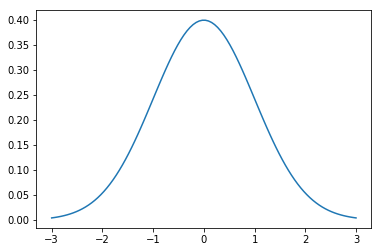

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()

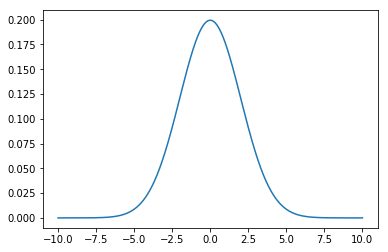

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Plot between -10 and 10 with .001 steps.
x_axis = np.arange(-10, 10, 0.001)
# Mean = 0, SD = 2.
plt.plot(x_axis, norm.pdf(x_axis,0,2))
plt.show()

상관계수

In [0]:
# 상관계수
import math

def mean(x): 
  return sum(x) / len(x)

def sum_of_product(v,w): 
  return sum(v_i * w_i for v_i, w_i in zip(v,w)) 

def sum_of_squares(v): 
  return sum_of_product(v,v) 

def deviation(x):  
  x_bar = mean(x) 
  return [x_i - x_bar for x_i in x] 

def variance(x): 
  n = len(x) 
  deviations = deviation(x) 
  return sum_of_squares(deviations) / (n-1) 

def covariance(x,y): 
  n = len(x) 
  return sum_of_product(deviation(x), deviation(y)) / (n-1) 

def standard_deviation(x): 
  return math.sqrt(variance(x)) 

def correlation(x,y): 
  stdev_x = standard_deviation(x) 
  stdev_y = standard_deviation(y) 
  if stdev_x > 0 and stdev_y > 0: 
    return covariance(x,y) / (stdev_x * stdev_y)
  else : 
    return 0 # 편차가 존재하지 않는다면 상관관계는 0

x=[41,43,38,37]
y=[61,63,56,55]
print(correlation(x,y))

x=[35,45,35,34]
y=[65,54,64,67]
print(correlation(x,y))

x=[35,45,35,34]
y=[65,66,64,68]
print(correlation(x,y))


0.9950765901904326
-0.9910397700847882
0.009405128133399419


3장 평균-분산 포트폴리오 이론

In [0]:
stock_a = [ 0.07, 0.04, 0.01 ]
stock_b = [ 0.13, 0.04, -0.05 ]
prob  = [ 1/3, 1/3, 1/3 ]
ex_a  = 0.0
ex_b  = 0.0
wgt_a = 0.5
wgt_b = 0.5
for s, p in zip(stock_a, prob):
  ex_a = ex_a + s*p
for s, p in zip(stock_b, prob):
  ex_b = ex_b + s*p
ex_p = wgt_a * ex_a + wgt_b * ex_b
print('주식A의 기대수익률은 {:.2%}'.format(ex_a))
print('주식B의 기대수익률은 {:.2%}'.format(ex_b))
print('포트폴리오의 기대수익률은 {:.2%}'.format(ex_p))


주식A의 기대수익률은 4.00%
주식B의 기대수익률은 4.00%
포트폴리오의 기대수익률은 4.00%


In [0]:
s1='abc'
s2='def'


print(list(zip(a1,a2)))

for x, y in zip(a1, a2):
  print(x,y)

[('a', 'd'), ('b', 'e'), ('c', 'f')]
a d
b e
c f


In [0]:
import numpy as np

a = np.matrix( [ [1, 2], [3, 4] ] )
a = np.matrix( '1 2; 3 4' )
ap = a + a
am = a - a
aa = a * a
amul = np.multiply(a, a)
ad = a / a
print(ap)
print(am)
print(aa)
print(amul)
print(ad)

aT = a.T
print(aT)
aI = a.I
print(aI)

[[2 4]
 [6 8]]
[[0 0]
 [0 0]]
[[ 7 10]
 [15 22]]
[[ 1  4]
 [ 9 16]]
[[1. 1.]
 [1. 1.]]
[[1 3]
 [2 4]]
[[-2.   1. ]
 [ 1.5 -0.5]]


In [0]:


# 경기국면별 확률과 주식의 기대수익률
stock_a = [ 0.07, 0.04, 0.01 ]
stock_b = [ 0.13, 0.04, -0.05 ]
prob = [ 1/3, 1/3, 1/3 ]

ex_a = 0.0
ex_b = 0.0
wgt_a = 0.5
wgt_b = 1.0 - wgt_a

# for s, p in zip(stock_a, prob):
#   ex_a = ex_a + s*p

ex_a = sum(s*p for s, p in zip(stock_a, prob)) 

# for s, p in zip(stock_b, prob):
#   ex_b = ex_b + s*p
  
ex_b = sum(s*p for s, p in zip(stock_b, prob))   


ex_p = wgt_a * ex_a + wgt_b * ex_b

print('주식A의 기대수익률은 {:.2%}'.format(ex_a))
print('주식B의 기대수익률은 {:.2%}'.format(ex_b))
print('포트폴리오의 기대수익률은 {:.2%}'.format(ex_p))

var_a = 0.0
var_b = 0.0


# for s, p in zip(stock_a, prob):
#   var_a = var_a + p*(s-ex_a)**2

var_a = sum(p*(s-ex_b)**2 for s,p in zip(stock_a, prob))  

# for s, p in zip(stock_b, prob):
#   var_b = var_b + p*(s-ex_b)**2

var_b = sum(p*(s-ex_b)**2 for s,p in zip(stock_b, prob))

print('주식A의 분산은 {:.2%}'.format(var_a))
print('주식B의 분산은 {:.2%}'.format(var_b))

cov = sum(p*(a-ex_a)*(b-ex_b) for a,b,p in zip(stock_a, stock_b, prob))

var_p = wgt_a**2 * var_a + wgt_b**2 * var_b + 2*wgt_a*wgt_b*cov

print('포트폴리오의 분산은 {:.2%}'.format(var_p))

주식A의 기대수익률은 4.00%
주식B의 기대수익률은 4.00%
포트폴리오의 기대수익률은 4.00%
주식A의 분산은 0.06%
주식B의 분산은 0.54%
포트폴리오의 분산은 0.24%


Numpy array  기본사용방법

In [0]:
import numpy as np


a1 = np.array([1,2,3,4])
a2 = np.array([[1,2],[3,4]])

print('a1의 값:')
print(a1)

print('a1의 값:(각 원소)')
print(a1[0], a1[1], a1[2], a1[3])

print('a1의 차원은? ', a1.ndim)
print('a1의 행의 갯수? ', len(a1))
print('a1의 크기는?', a1.shape)
print()

print('a2의 값:(모든 값)')
print(a2)

print('a2의 값:(각 원소)')
print(a2[0][0], a2[0][1])
print(a2[1][0], a2[1][1])

print('a2의 값:(각 원소)')
print(a2[0,0], a2[0,1])
print(a2[1,0], a2[1,1])

print('a2의 차원은? ', a2.ndim)
print('a2의 행의 갯수? ', len(a2))
print('a2의 열의 갯수? ', len(a2[0]))
print('a2의 크기는? ', a2.shape)

print()

a0 = np.zeros(9)
print('zero 벡터:\n', a0)

a0 = np.zeros((3,3))
print('3x3의 zero 행렬:\n', a0)

a1의 값:
[1 2 3 4]
a1의 값:(각 원소)
1 2 3 4
a1의 차원은?  1
a1의 행의 갯수?  4
a1의 크기는? (4,)

a2의 값:(모든 값)
[[1 2]
 [3 4]]
a2의 값:(각 원소)
1 2
3 4
a2의 값:(각 원소)
1 2
3 4
a2의 차원은?  2
a2의 행의 갯수?  2
a2의 열의 갯수?  2
a2의 크기는?  (2, 2)

zero 벡터:
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
3x3의 zero 행렬:
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [0]:
import numpy as np

a3 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
print(a3)

a33 = a3.reshape(3, 3)
print('3x3 행렬로 바꾸면: \n', a33)

a33T = a33.T
print('전치행렬은 : \n', a33T)

[1 2 3 4 5 6 7 8 9]
3x3 행렬로 바꾸면: 
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
전치행렬은 : 
 [[1 4 7]
 [2 5 8]
 [3 6 9]]
[ 2  4  6  8 10 12 14 16 18]
[[ 2  4  6]
 [ 8 10 12]
 [14 16 18]]


In [0]:
import numpy as np

a1 = np.array([[1, 2], [3, 4]])
a2 = np.array([[0, 1], [2, 3]])

a11 = a1 * 2
print('a1*2의 결과는:\n', a11)

a3 = a1 + a2
print('a1+a2의 결과는:\n', a3)

a4 = a1 - a2
print('a1-a2의 결과는:\n', a4)

a5 = a1 * a2
print('a1*a2의 결과는:\n', a5)

a6 = np.matmul(a1, a2)
print('matmul(a1,a2)의 결과는:\n', a6)

a7 = np.dot(a1, a2)
print('dot(a1,a2)의 결과는:\n', a7)

# print(np.dot(2, a3))
# print(np.dot(2, a33))


a1*2의 결과는:
 [[2 4]
 [6 8]]
a1+a2의 결과는:
 [[1 3]
 [5 7]]
a1-a2의 결과는:
 [[1 1]
 [1 1]]
a1*a2의 결과는:
 [[ 0  2]
 [ 6 12]]
matmul(a1,a2)의 결과는:
 [[ 4  7]
 [ 8 15]]
dot(a1,a2)의 결과는:
 [[ 4  7]
 [ 8 15]]


In [0]:
import numpy as np

# 경기국면별 확률과 주식의 기대수익률
stock_a = np.array([ 0.07, 0.04, 0.01 ])
stock_b = np.array([ 0.13, 0.04, -0.05 ])
prob =np.array( [ 1/3, 1/3, 1/3 ])

wgt_a = 0.5
wgt_b = 1.0 - wgt_a
wgt_ab = np.array([wgt_a, wgt_b])

ex_a = np.dot(prob, stock_a)
ex_b = np.dot(prob, stock_b)
ex_ab = np.array([ex_a, ex_b])
ex_p = np.dot(wgt_ab, ex_ab)

print('주식A의 기대수익률은 {:.2%}'.format(ex_a))
print('주식B의 기대수익률은 {:.2%}'.format(ex_b))
print('포트폴리오의 기대수익률은 {:.2%}'.format(ex_p))

var_a = 0.0
var_b = 0.0


# for s, p in zip(stock_a, prob):
#   var_a = var_a + p*(s-ex_a)**2

var_a = sum(p*(s-ex_b)**2 for s,p in zip(stock_a, prob))  

# for s, p in zip(stock_b, prob):
#   var_b = var_b + p*(s-ex_b)**2

var_b = sum(p*(s-ex_b)**2 for s,p in zip(stock_b, prob))

print('주식A의 표준편차는 {:.2%}'.format(np.sqrt(var_a)))
print('주식B의 표준편차는 {:.2%}'.format(np.sqrt(var_b)))

cov = sum(p*(a-ex_a)*(b-ex_b) for a,b,p in zip(stock_a,stock_b,prob))
var_p = np.dot(wgt_ab.T,np.dot(cov,wgt_ab))
# var_p = wgt_a**2 * var_a + wgt_b**2 * var_b + 2*wgt_a*wgt_b*cov
# print(np.dot([0.5,0.5],np.dot(cov,[0.5,0.5])))
print('포트폴리오의 분산은 {:.2%}'.format(var_p))


주식A의 기대수익률은 4.00%
주식B의 기대수익률은 4.00%
포트폴리오의 기대수익률은 4.00%
주식A의 표준편차는 2.45%
주식B의 표준편차는 7.35%
포트폴리오의 분산은 0.09%


[[0.4, 0.6]]
[[0.4], [0.6]]
